## Observations and Insights

## Observations or inferences that can be made from the data.

1. "Ketapril" Drug Regimen has highest tumor volume based mean, median, variance, STD and SEM calculation.
2. Majority of the mouses were treated using "Capomulin" Drug
3.

## Dependencies and starter code

In [62]:
# Include this line to make plots interactive
# %matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
medical_data_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
medical_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

medical_tumor_data = pd.DataFrame(medical_data_df, columns = ['Drug Regimen','Tumor Volume (mm3)'])
tumor_response_mean = medical_tumor_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_response_median = medical_tumor_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_response_variance = medical_tumor_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_response_std = medical_tumor_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_response_sem = medical_tumor_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

#Preparing summary
tumor_summary_statistics = pd.DataFrame(
{
    "mean tumor volume": tumor_response_mean,
    "median tumor volume": tumor_response_median,
    "variance tumor volume":tumor_response_variance,
    "STD tumor volume":tumor_response_std,
    "SEM tumor volume":tumor_response_sem
})

tumor_summary_statistics

,mean tumor volume,median tumor volume,variance tumor volume,STD tumor volume,SEM tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

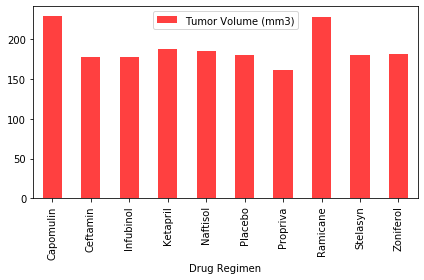

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_df = medical_tumor_data.groupby(["Drug Regimen"]).count()
tumor_df = tumor_df.reset_index()
tumor_df.plot.bar(x='Drug Regimen', y='Tumor Volume (mm3)', facecolor="red", alpha=0.75, align="center")
plt.tight_layout()
plt.show()

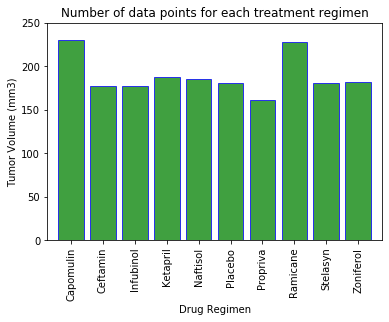

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
tumor_df = medical_tumor_data.groupby(["Drug Regimen"]).count()
tumor_df = tumor_df.reset_index()
x_axis = pd.Series(tumor_df['Drug Regimen'])
y_axis= pd.Series(tumor_df['Tumor Volume (mm3)'])

# Create bars
plt.bar(x_axis, y_axis, color='green',edgecolor='b', alpha=0.75, align="center")

# Create the ticks for our bar chart's x axis
# Create names on the x-axis --> Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)
# Set the limits of the y axis
plt.ylim(0, max(y_axis)+20)
# Give the chart a title, x label, and y label
plt.title("Number of data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Pie plots

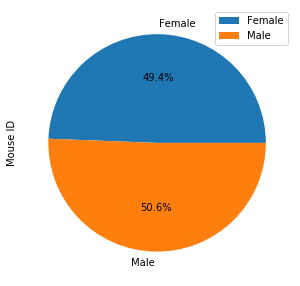

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_data = pd.DataFrame(medical_data_df, columns = ['Mouse ID','Sex'])
mice_df = mice_data.groupby(["Sex"]).count()
mice_df = mice_df.reset_index()
#Draw Pie chart
mice_df.plot.pie(y='Mouse ID',labels=mice_df['Sex'], figsize=(5,5),autopct='%1.1f%%') 

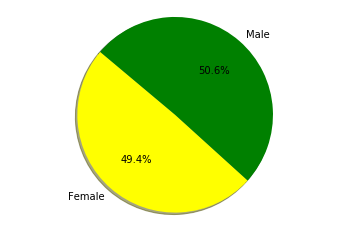

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_data = pd.DataFrame(medical_data_df, columns = ['Mouse ID','Sex'])
mice_df = mice_data.groupby(["Sex"]).count()
mice_df = mice_df.reset_index()

#Get series from DataFrame
gender_name = pd.Series(mice_df['Sex'])
gender_count= pd.Series(mice_df['Mouse ID'])

colors = ["yellow", "green"]
explode = (0, 0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_count, explode=explode, labels=gender_name, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
#End of the session
plt.show()

## Quartiles, outliers and boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
#Create a DaraFrame for the required columns
final_tumor_df = pd.DataFrame(medical_data_df, columns = ['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen'])

# Select across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
tumor_volume_data_df = final_tumor_df[final_tumor_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]

mouse_groups = final_tumor_df.groupby(['Mouse ID','Drug Regimen'])['Timepoint','Tumor Volume (mm3)'].max()
mouse_groups = mouse_groups.reset_index()
mouse_groups = mouse_groups.sort_values('Tumor Volume (mm3)', ascending=False)
mouse_groups.head(10)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
137,o331,Ketapril,45,78.567014
113,l725,Naftisol,45,76.668817
148,p189,Ketapril,45,75.294936
118,m269,Stelasyn,45,75.123690
187,t724,Naftisol,45,75.113288
16,a818,Naftisol,45,74.997764
73,h246,Ketapril,45,74.104086
32,c402,Stelasyn,45,74.040390
123,m650,Ketapril,45,73.901399
248,z969,Naftisol,45,73.867845


In [42]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
Tumor_volume = mouse_groups['Tumor Volume (mm3)']
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = Tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

lower_bound_outliers = mouse_groups[mouse_groups['Tumor Volume (mm3)'] < lower_bound]
upper_bound_outliers = mouse_groups[mouse_groups['Tumor Volume (mm3)'] > upper_bound]

if lower_bound_outliers.empty:
    print(f"Values below {lower_bound} could be outliers, but There are no lower bound outliers in this dataset!")
else:
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Here is lower_bound_outliers")
    lower_bound_outliers.head()

if upper_bound_outliers.empty:
    print(f"Values above {upper_bound} could be outliers, but There are no upper bound outliers in this dataset!")
else:
    print(f"Values above {upper_bound} could be outliers.")
    print(f"Here is upper_bound_outliers in this dataset")
    upper_bound_outliers.head()

The lower quartile of Tumor Volume (mm3) is: 46.91089166
The upper quartile of Tumor Volume (mm3) is: 64.95756185
The interquartile range of Tumor Volume (mm3) is: 18.046670190000007
The the median of Tumor Volume (mm3) is: 55.84141007 
Values below 19.840886374999986 could be outliers, but There are no lower bound outliers in this dataset!
Values above 92.02756713500001 could be outliers, but There are no upper bound outliers in this dataset!


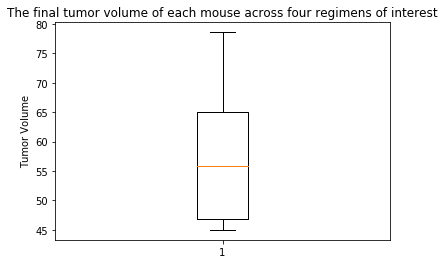

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('The final tumor volume of each mouse across four regimens of interest')
ax1.set_ylabel('Tumor Volume')
#to generate the boxplot
ax1.boxplot(Tumor_volume)
plt.show()

## Line and scatter plots

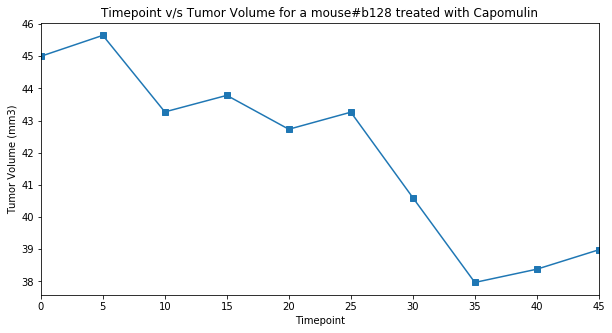

<Figure size 432x288 with 0 Axes>

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor_volume_data_df = pd.DataFrame(medical_data_df, columns = ['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen'])
tumor_volume_data_df = tumor_volume_data_df[tumor_volume_data_df['Drug Regimen'].isin(['Capomulin'])]
mouse_groups = tumor_volume_data_df.groupby(['Mouse ID','Timepoint'])["Tumor Volume (mm3)"].sum()
# Make a variable called mouse_id and store a 'mouse id' in it
mouse_id = "b128"
# Collect the data of the 'mouse_id' above
tumor_data_one_mice = mouse_groups.loc[mouse_id]
tumor_data_one_mice.plot(kind="line",marker='s', figsize=(10,5))
# Set a title for the chart
plt.title("Timepoint v/s Tumor Volume for a mouse#b128 treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

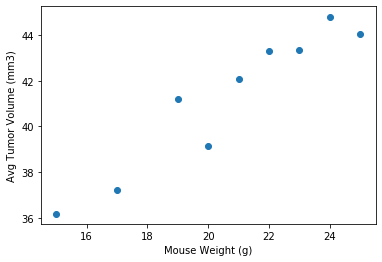

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Selected the columns and create a new dataset
mouse_weight_data_df = pd.DataFrame(medical_data_df, columns = ['Tumor Volume (mm3)','Drug Regimen','Weight (g)'])
mouse_weight_data_df = mouse_weight_data_df[mouse_weight_data_df['Drug Regimen'].isin(['Capomulin'])]

#Average tumor volume for the Capomulin regimen
mouse_weight_groups = mouse_weight_data_df.groupby(['Weight (g)','Drug Regimen'])["Tumor Volume (mm3)"].mean()
mouse_weight_groups = mouse_weight_groups.reset_index()
#Plot scatter plot
plt.scatter(mouse_weight_groups['Weight (g)'],mouse_weight_groups['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

The correlation coefficient between both factors is 0.95
The regress_values as part of linear regression model is 0    36.185819
1    37.975364
2    39.764910
3    40.659682
4    41.554455
5    42.449227
6    43.344000
7    44.238773
8    45.133545
Name: Weight (g), dtype: float64
The r-squared is: 0.9505243961855266


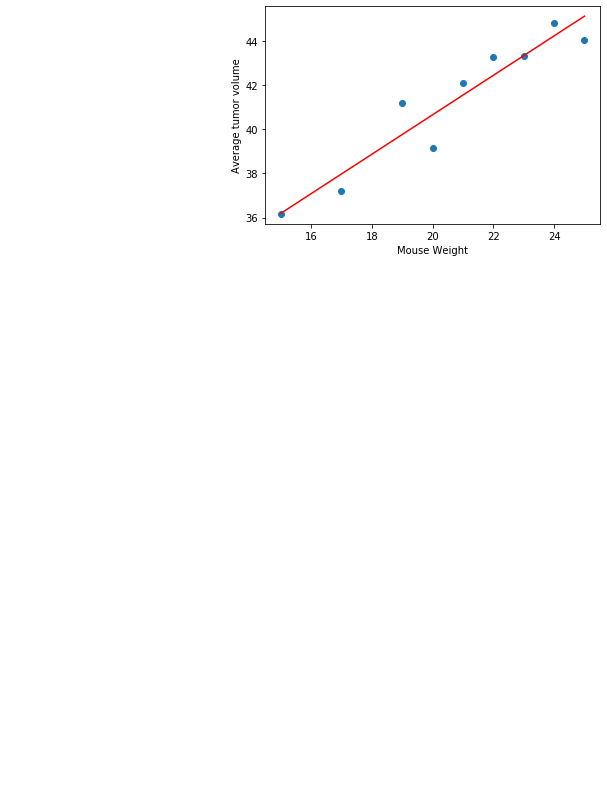

In [68]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
#Selected the columns and create a new dataset
mouse_weight = mouse_weight_groups['Weight (g)']
average_tumor_volume = mouse_weight_groups['Tumor Volume (mm3)']
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight_groups['Weight (g)']
y_values = mouse_weight_groups['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The regress_values as part of linear regression model is {regress_values}")

# Plot the linear regression model on top of the previous scatter plot.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average tumor volume')
print(f"The r-squared is: {rvalue}")
plt.show()